# Fashion MNIST - Deep Learning

In [30]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import logging
import matplotlib.pyplot as plt
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 20
BATCH_SIZE = 64

## Preparing the data

In [49]:
# Load training and test datasets.
fashion = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion.load_data()

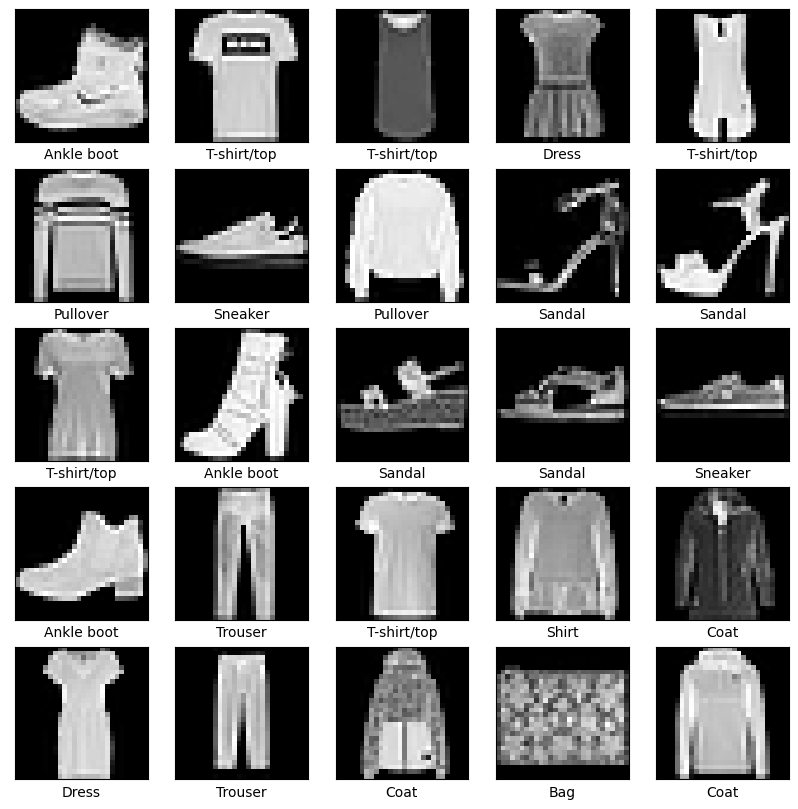

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [50]:
# Standardize the data.
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev
# One-hot encode labels.
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

## Building the Model

In [55]:
# Create a Sequential model.
# 784 inputs.
# Three layers with 128, 64, and 10 neurons.
# relu as activation function for first and second hidden layer with He normal initializer
# and batch normalization.
# Softmax as activation function for output layer and Glorot uniform initializer.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu',
                      kernel_initializer='he_normal',
                       bias_initializer='zeros'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu',
                       kernel_initializer='he_normal',
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros')])

# Use Adam optimizer with default parameters.
# Categorical cross-entropy as loss function and
# report accuracy during training.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())
# Train the model for 20 epochs.
# Shuffle (randomize) order.
# Update weights after 64 examples (batch_size=64).
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=2, shuffle=True)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_19 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,898
Trainable params: 109,642
Non-trainable params: 256
_____________________________________________

Validation accuracy is about 88%-89%